In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 



In [2]:
data = pd.read_csv('/Users/ronakpatel/Data_Science_Work/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#we should get rid of RowNumber, CustomerID,Surname

df = data.drop(['RowNumber','CustomerId','Surname'],axis='columns')

In [18]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [27]:
#checking for any missing values

col_names = ['CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']

for name in col_names:
    print(f'Name of the Col:{name}, No of Missing Values: {df[name].isnull().sum()} \n')
    
    


Name of the Col:CreditScore, No of Missing Values: 0 

Name of the Col:Geography, No of Missing Values: 0 

Name of the Col:Gender, No of Missing Values: 0 

Name of the Col:Age, No of Missing Values: 0 

Name of the Col:Tenure, No of Missing Values: 0 

Name of the Col:Balance, No of Missing Values: 0 

Name of the Col:NumOfProducts, No of Missing Values: 0 

Name of the Col:HasCrCard, No of Missing Values: 0 

Name of the Col:IsActiveMember, No of Missing Values: 0 

Name of the Col:EstimatedSalary, No of Missing Values: 0 

Name of the Col:Exited, No of Missing Values: 0 



(array([ 89., 137., 231., 354., 482., 675., 822., 889., 930., 955., 855.,
        687., 554., 455., 343., 281., 221., 158., 227., 129., 115.,  92.,
         55.,  72.,  41.,  45.,  34.,  27.,  21.,   9.,   7.,   2.,   3.,
          0.,   1.,   2.]),
 array([18.        , 20.05555556, 22.11111111, 24.16666667, 26.22222222,
        28.27777778, 30.33333333, 32.38888889, 34.44444444, 36.5       ,
        38.55555556, 40.61111111, 42.66666667, 44.72222222, 46.77777778,
        48.83333333, 50.88888889, 52.94444444, 55.        , 57.05555556,
        59.11111111, 61.16666667, 63.22222222, 65.27777778, 67.33333333,
        69.38888889, 71.44444444, 73.5       , 75.55555556, 77.61111111,
        79.66666667, 81.72222222, 83.77777778, 85.83333333, 87.88888889,
        89.94444444, 92.        ]),
 <BarContainer object of 36 artists>)

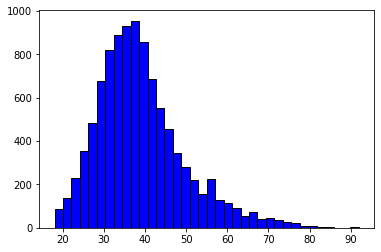

In [37]:
#No Missing Values for any of the columns 
#Now before we decide to scale the values for the some of the columns we should check
# the overall distribution of the values becuse scalling can be very much affected by the
# outliers 


plt.hist(df['Age'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))



In [46]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [60]:
#rounding up the values of the floating point columns and chaning thier type to int64
float_cols_names = ['Balance','EstimatedSalary']

for a in float_cols_names:
    df[a] = df[a].round()
    df[a] = df[a].astype('int64')
    
    

In [61]:
df.dtypes

CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance             int64
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int64
EstimatedSalary     int64
Exited              int64
dtype: object

In [75]:
#checking the values abnormality (values other than 1 and 0)

print(df['HasCrCard'].value_counts())
print(df['IsActiveMember'].value_counts())
print(df['Exited'].value_counts())



1    7055
0    2945
Name: HasCrCard, dtype: int64
1    5151
0    4849
Name: IsActiveMember, dtype: int64
0    7963
1    2037
Name: Exited, dtype: int64


In [59]:
df['Balance'].dtype

dtype('float64')

(array([  9.,   5.,   3.,   6.,  31.,  53.,  70.,  77.,  97., 139., 186.,
        233., 275., 297., 343., 342., 430., 438., 498., 498., 558., 568.,
        537., 566., 512., 528., 404., 391., 359., 315., 282., 230., 175.,
        127., 103., 315.]),
 array([350.        , 363.88888889, 377.77777778, 391.66666667,
        405.55555556, 419.44444444, 433.33333333, 447.22222222,
        461.11111111, 475.        , 488.88888889, 502.77777778,
        516.66666667, 530.55555556, 544.44444444, 558.33333333,
        572.22222222, 586.11111111, 600.        , 613.88888889,
        627.77777778, 641.66666667, 655.55555556, 669.44444444,
        683.33333333, 697.22222222, 711.11111111, 725.        ,
        738.88888889, 752.77777778, 766.66666667, 780.55555556,
        794.44444444, 808.33333333, 822.22222222, 836.11111111,
        850.        ]),
 <BarContainer object of 36 artists>)

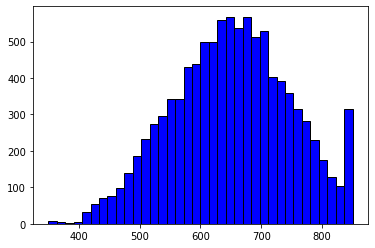

In [36]:
plt.hist(df['CreditScore'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))



(array([ 413.,    0.,    0., 1035.,    0.,    0.,    0., 1048.,    0.,
           0., 1009.,    0.,    0.,    0.,  989.,    0.,    0.,    0.,
        1012.,    0.,    0.,  967.,    0.,    0.,    0., 1028.,    0.,
           0., 1025.,    0.,    0.,    0.,  984.,    0.,    0.,  490.]),
 array([ 0.        ,  0.27777778,  0.55555556,  0.83333333,  1.11111111,
         1.38888889,  1.66666667,  1.94444444,  2.22222222,  2.5       ,
         2.77777778,  3.05555556,  3.33333333,  3.61111111,  3.88888889,
         4.16666667,  4.44444444,  4.72222222,  5.        ,  5.27777778,
         5.55555556,  5.83333333,  6.11111111,  6.38888889,  6.66666667,
         6.94444444,  7.22222222,  7.5       ,  7.77777778,  8.05555556,
         8.33333333,  8.61111111,  8.88888889,  9.16666667,  9.44444444,
         9.72222222, 10.        ]),
 <BarContainer object of 36 artists>)

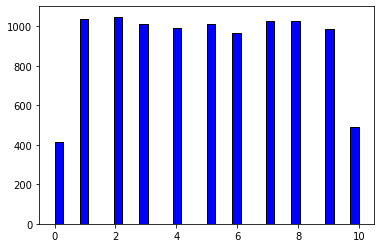

In [39]:
plt.hist(df['Tenure'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

{'whiskers': [<matplotlib.lines.Line2D at 0x17e5229d0>,
 'caps': [<matplotlib.lines.Line2D at 0x17e526290>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e522650>],
 'medians': [<matplotlib.lines.Line2D at 0x17e526b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e526f90>],
 'means': []}

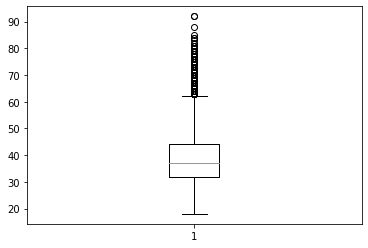

In [44]:
plt.boxplot(df['Age'])


{'whiskers': [<matplotlib.lines.Line2D at 0x17e4e8a90>,
 'caps': [<matplotlib.lines.Line2D at 0x17e4ec350>,
 'boxes': [<matplotlib.lines.Line2D at 0x17e4e8710>],
 'medians': [<matplotlib.lines.Line2D at 0x17e4ecc10>],
 'fliers': [<matplotlib.lines.Line2D at 0x17e4f3090>],
 'means': []}

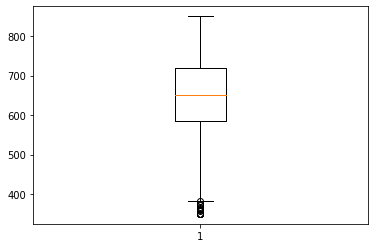

In [43]:
plt.boxplot(df['CreditScore'])

{'whiskers': [<matplotlib.lines.Line2D at 0x17a79af50>,
 'caps': [<matplotlib.lines.Line2D at 0x17dbdf1d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d4e9d50>],
 'medians': [<matplotlib.lines.Line2D at 0x17b1083d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x17b108150>],
 'means': []}

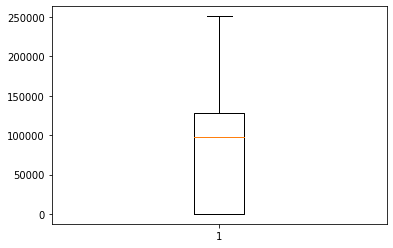

In [70]:
plt.boxplot(df['Balance'])

In [71]:
df.dtypes

CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance             int64
NumOfProducts       int64
HasCrCard           int64
IsActiveMember      int64
EstimatedSalary     int64
Exited              int64
dtype: object

In [76]:
numeric_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

In [78]:
#minmax scalling 


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [79]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,France,Female,0.324324,0.2,0.000000,1,1,1,0.506736,1
1,0.516,Spain,Female,0.310811,0.1,0.334032,1,0,1,0.562711,0
2,0.304,France,Female,0.324324,0.8,0.636358,3,1,0,0.569657,1
3,0.698,France,Female,0.283784,0.1,0.000000,2,0,0,0.469122,0
4,1.000,Spain,Female,0.337838,0.2,0.500247,1,1,1,0.395400,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,France,Male,0.283784,0.5,0.000000,2,1,0,0.481343,0
9996,0.332,France,Male,0.229730,1.0,0.228659,1,1,1,0.508491,0
9997,0.718,France,Female,0.243243,0.7,0.000000,1,0,1,0.210391,1
9998,0.844,Germany,Male,0.324324,0.3,0.299225,2,1,0,0.464431,1


In [80]:
#modifying gender column

df['Gender'].replace({'Female':1,'Male':0},inplace=True)


0    5457
1    4543
Name: Gender, dtype: int64

In [83]:
#hot encoding the cols
df = pd.get_dummies(data=df, columns=['Geography','NumOfProducts'])

In [86]:
df.dtypes

CreditScore          float64
Gender                 int64
Age                  float64
Tenure               float64
Balance              float64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
NumOfProducts_1        uint8
NumOfProducts_2        uint8
NumOfProducts_3        uint8
NumOfProducts_4        uint8
dtype: object

In [87]:
#now seperating the Independent and Dependent Variable

x=df.drop('Exited',axis='columns')
y=df['Exited']

#splitting the data into 80 20 ratio

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=5)

/usr/local/opt/python/Frameworks/Python.framework/Versions/3.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [90]:
#verifying the split
x_train.shape

(8000, 15)

In [93]:
#building the NN

model1 = keras.Sequential([
    keras.layers.Dense(15,input_shape=(15,),activation='tanh'),
    keras.layers.Dense(10,activation='tanh'),
    keras.layers.Dense(1,activation='sigmoid')
])

model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model1.fit(x_train,y_train,epochs=100)




Epoch 1/100
250/250 [==============================] - 0s 657us/step - loss: 0.5168 - accuracy: 0.7754
Epoch 2/100
250/250 [==============================] - 0s 626us/step - loss: 0.4127 - accuracy: 0.8216
Epoch 3/100
250/250 [==============================] - 0s 641us/step - loss: 0.3991 - accuracy: 0.8348
Epoch 4/100
250/250 [==============================] - 0s 639us/step - loss: 0.3718 - accuracy: 0.8441
Epoch 5/100
250/250 [==============================] - 0s 627us/step - loss: 0.3687 - accuracy: 0.8435
Epoch 6/100
250/250 [==============================] - 0s 657us/step - loss: 0.3618 - accuracy: 0.8417
Epoch 7/100
250/250 [==============================] - 0s 658us/step - loss: 0.3536 - accuracy: 0.8476
Epoch 8/100
250/250 [==============================] - 0s 652us/step - loss: 0.3630 - accuracy: 0.8471
Epoch 9/100
250/250 [==============================] - 0s 650us/step - loss: 0.3495 - accuracy: 0.8571
Epoch 10/100
250/250 [==============================] - 0s 637us/step - l

SyntaxError: unexpected EOF while parsing (<ipython-input-2-41e74d22f40f>, line 1)